In [1]:
import cv2
import mediapipe as mp
import numpy as np
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [2]:
###모션캡처

# Opens the inbuilt camera of laptop to capture video.
cap = cv2.VideoCapture(0)
i = 0
 
while(cap.isOpened()):
    ret, frame = cap.read()
     
    # This condition prevents from infinite looping
    # incase video ends.
    if ret == False:
        break
     
    # Save Frame by Frame into disk using imwrite method
    if ret:
        cv2.imshow('camera', frame)
        if cv2.waitKey(1000):
           cv2.imwrite('C:/Users/JECS/jk/project/my_project/capture/peo'+str(i)+'.jpg', frame)
    i = i + 1
cap.release()
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [7]:
import os
import natsort
 
root_dir = 'C:/Users/JECS/jk/project/my_project/capture2' # 디렉토리
 
img_path_list = []
possible_img_extension = ['.jpg', '.jpeg', '.JPG', '.bmp', '.png'] # 이미지 확장자들
 
for (root, dirs, files) in os.walk(root_dir):
    if len(files) > 0:
        for file_name in files:
            if os.path.splitext(file_name)[1] in possible_img_extension:
                img_path = root + '/' + file_name
                
                # 경로에서 \를 모두 /로 바꿔줘야함
                img_path = img_path.replace('\\', '/') # \는 \\로 나타내야함         
                img_path_list.append(img_path)
                             
print(img_path_list)

['C:/Users/JECS/jk/project/my_project/capture2/cap0.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap1.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap10.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap11.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap2.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap3.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap4.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap5.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap6.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap7.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap8.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap9.jpg']


In [8]:


import natsort

img_path_list = natsort.natsorted(img_path_list)
print(img_path_list)

['C:/Users/JECS/jk/project/my_project/capture2/cap0.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap1.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap2.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap3.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap4.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap5.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap6.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap7.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap8.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap9.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap10.jpg', 'C:/Users/JECS/jk/project/my_project/capture2/cap11.jpg']


In [31]:
foot_points=[]
IMAGE_FILES = img_path_list

pose = mp_pose.Pose(
    static_image_mode=True,
    model_complexity=2,
    enable_segmentation=True,
    min_detection_confidence=0)  
for idx, file in enumerate(IMAGE_FILES):
  
  
  
  
  image = cv2.imread(file)
  image_height, image_width, _ = image.shape
  print(image.shape)
  # Convert the BGR image to RGB before processing.
  results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  
  right_foot_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x*image_width
  right_foot_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y*image_height
  left_foot_x = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x*image_width
  left_foot_y = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y*image_height
  foot_x = (right_foot_x+left_foot_x)/2
  foot_y = (right_foot_y+left_foot_y)/2
  foot_points.append((int(foot_x),int(foot_y),1))
  print(foot_points)

    

  annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
  
  # Draw pose landmarks on the image.
  mp_drawing.draw_landmarks(
      annotated_image,
      results.pose_landmarks,
      mp_pose.POSE_CONNECTIONS,
      landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
  cv2.imwrite('C:/Users/JECS/jk/project/my_project/keypoints/key' + str(idx) + '.png', annotated_image)
  

(480, 640, 3)
[(415, 359, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1), (402, 345, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1), (402, 345, 1), (379, 360, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1), (402, 345, 1), (379, 360, 1), (335, 389, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1), (402, 345, 1), (379, 360, 1), (335, 389, 1), (352, 421, 1)]
(480, 640, 3)
[(415, 359, 1), (373, 361, 1), (321, 352, 1), (294, 347, 1), (417, 350, 1), (402, 345, 1), (379, 360, 1), (335, 389, 1), (352, 421, 1), (374, 455, 1)]
(480, 640, 3)
[(415, 359,

In [3]:
#캡처

import cv2

cap = cv2.VideoCapture(0)                       # 0번 카메라 연결
if cap.isOpened() :
    while True:
        ret, frame = cap.read()                 # 카메라 프레임 읽기
        if ret:
            cv2.imshow('camera',frame)          # 프레임 화면에 표시
            if cv2.waitKey(1) != -1:            # 아무 키나 누르면
                cv2.imwrite('C:/Users/JECS/jk/project/my_project/ROI/pre_image.jpg', frame) # 프레임을 'photo.jpg'에 저장
                break
        else:
            print('no frame!')
            break
else:
    print('no camera!')
cap.release()
cv2.destroyAllWindows()

no frame!


In [5]:
#변환행렬1

import numpy as np
import cv2

point_list=[]
count=0
img_original = cv2.imread('C:/Users/JECS/jk/project/my_project/ROI/pre_image_white.jpg')

def mouse_callback(event, x, y, flags, param):
    global point_list, count, img_original
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print("(%d,%d)"%(x,y))
        point_list.append((x,y))
        
        
        print(point_list)
        cv2.circle(img_original,(x,y), 3, (0,0,255),-1)

cv2.namedWindow('original',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('original', mouse_callback)

x,y=100,100
while(True):
    cv2.imshow("original",img_original)
    height,width=img_original[:2]
    cv2.moveWindow("original",x,y)
    key=cv2.waitKey(0)&0xFF
    
    if key ==ord('h'):
        x-=10
    elif key ==ord('j'):
        y+=10
    elif key==ord('k'):
        y-=10
    elif key==ord('q')or key==27:
        break
   



pts1 = np.float32([list(point_list[0]),list(point_list[1]),list(point_list[2]),list(point_list[3])])
pts2 = np.float32([[0,480],[640,480],[640,0],[0,0]])

print=(pts1)
print=(pts2)

M=cv2.getPerspectiveTransform(pts1,pts2)

img_result = cv2.warpPerspective(img_original, M, (640,480))

cv2.imshow("results1",img_result)
cv2.imwrite('C:/Users/JECS/jk/project/my_project/ROI/trans_img.jpg', img_result )
cv2.waitKey(0)
cv2.destroyAllWindows()
    

(191,383)
[(191, 383)]
(458,335)
[(191, 383), (458, 335)]
(279,285)
[(191, 383), (458, 335), (279, 285)]
(99,296)
[(191, 383), (458, 335), (279, 285), (99, 296)]


In [6]:
M

array([[-1.06342319e+00,  1.12453947e+00, -2.27584786e+02],
       [-2.54150156e-01, -4.15882074e+00,  1.25617180e+03],
       [ 1.67082268e-04, -4.78958508e-03,  1.00000000e+00]])

In [7]:
M1=M

In [32]:
M1=np.array([[-1.06342319e+00,  1.12453947e+00, -2.27584786e+02],
       [-2.54150156e-01, -4.15882074e+00,  1.25617180e+03],
       [ 1.67082268e-04, -4.78958508e-03,  1.00000000e+00]])
M1

array([[-1.06342319e+00,  1.12453947e+00, -2.27584786e+02],
       [-2.54150156e-01, -4.15882074e+00,  1.25617180e+03],
       [ 1.67082268e-04, -4.78958508e-03,  1.00000000e+00]])

In [1]:
#변환행렬2

import numpy as np
import cv2

point_list=[]
count=0
img_original = cv2.imread('C:/Users/JECS/jk/project/my_project/ROI/trans_img.jpg')

def mouse_callback(event, x, y, flags, param):
    global point_list, count, img_original
    
    if event == cv2.EVENT_LBUTTONDOWN:
        print("(%d,%d)"%(x,y))
        point_list.append((x,y))
        
        
        print(point_list)
        cv2.circle(img_original,(x,y), 3, (0,0,255),-1)

cv2.namedWindow('original',cv2.WINDOW_NORMAL)
cv2.setMouseCallback('original', mouse_callback)

x,y=100,100
while(True):
    cv2.imshow("original",img_original)
    height,width=img_original[:2]
    cv2.moveWindow("original",x,y)
    key=cv2.waitKey(0)&0xFF
    
    if key ==ord('h'):
        x-=10
    elif key ==ord('j'):
        y+=10
    elif key==ord('k'):
        y-=10
    elif key==ord('q')or key==27:
        break
   



pts1 = np.float32([list(point_list[0]),list(point_list[1]),list(point_list[2]),list(point_list[3])])
pts2 = np.float32([[290,240],[383,240],[383,67],[290,67]])

print=(pts1)
print=(pts2)

M=cv2.getPerspectiveTransform(pts1,pts2)

img_result = cv2.warpPerspective(img_original, M, (640,480))

cv2.imshow("results1",img_result)
cv2.imwrite('C:/Users/JECS/jk/project/my_project/ROI/final_trans_img.jpg', img_result )
cv2.waitKey(0)
cv2.destroyAllWindows()
    

(4,473)
[(4, 473)]
(630,474)
[(4, 473), (630, 474)]
(632,6)
[(4, 473), (630, 474), (632, 6)]
(6,7)
[(4, 473), (630, 474), (632, 6), (6, 7)]


In [2]:
M

array([[1.51195456e-01, 6.57404678e-04, 2.89100275e+02],
       [1.05245245e-03, 3.71271609e-01, 6.43975678e+01],
       [6.85631488e-06, 5.87267351e-08, 1.00000000e+00]])

In [33]:
M2=np.array([[1.51195456e-01, 6.57404678e-04, 2.89100275e+02],
       [1.05245245e-03, 3.71271609e-01, 6.43975678e+01],
       [6.85631488e-06, 5.87267351e-08, 1.00000000e+00]])
M2

array([[1.51195456e-01, 6.57404678e-04, 2.89100275e+02],
       [1.05245245e-03, 3.71271609e-01, 6.43975678e+01],
       [6.85631488e-06, 5.87267351e-08, 1.00000000e+00]])

In [6]:
len(foot_points)

12

In [34]:
#변환후 좌표구하기

import numpy as np

# foot_points:변환 전 좌표 (x,y,1)
# raw_trans_foot_points : 변환 후 좌표 (ax',ay',a)
# trans_foot_points : 변환 후 좌표 (x',y',1)
trans_foot_points=[]

for i in range(len(foot_points)):
    raw_trans_foot_points = M1@foot_points[i]
    
    p = raw_trans_foot_points/raw_trans_foot_points[2]
    p1=p[0]
    p2=p[1]
    trans_foot_points.append((int(p1),int(p2),1))

In [35]:
trans_foot_points

[(407, 526, 1),
 (327, 509, 1),
 (273, 457, 1),
 (244, 426, 1),
 (457, 503, 1),
 (456, 479, 1),
 (341, 510, 1),
 (181, 553, 1),
 (134, 610, 1),
 (101, 654, 1),
 (73, 688, 1),
 (137, 632, 1)]

In [36]:
# trans_foot_points : 변환 후 좌표 (x',y',1)
final_trans_foot_points=[]

for i in range(len(trans_foot_points)):
    final_raw_trans_foot_points = M2@trans_foot_points[i]
    
    final_p = final_raw_trans_foot_points/final_raw_trans_foot_points[2]
    final_p1=final_p[0]
    final_p2=final_p[1]
    final_trans_foot_points.append((int(final_p1),int(final_p2)))

In [37]:
final_trans_foot_points

[(349, 259),
 (338, 253),
 (330, 233),
 (325, 222),
 (357, 250),
 (357, 241),
 (340, 253),
 (316, 269),
 (309, 290),
 (304, 307),
 (300, 319),
 (309, 298)]

In [39]:
#트래킹 이미지 한장씩
ROI_img = cv2.imread('C:/Users/JECS/jk/project/my_project/ROI/pre_image_final.jpg')
ROI_img = ROI_img.copy()

for i in range(len(final_trans_foot_points)):
    circle_img=cv2.circle(ROI_img,final_trans_foot_points[i],1,(0,0,255),thickness=5,lineType=cv2.LINE_AA)
    circle_img=cv2.putText(circle_img,str(i),(final_trans_foot_points[i][0],final_trans_foot_points[i][1]),
                    cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2,cv2.LINE_AA)
    cv2.imwrite('C:/Users/JECS/jk/project/my_project/foot/result'+str(i)+'.jpg',circle_img)
    

In [9]:
#foot이미지 영상으로 만들기

import cv2
import numpy as np
import glob
 
img_array = []

for filename in glob.glob('C:/Users/JECS/jk/project/my_project/foot/*.jpg'):
    img = cv2.imread(filename)
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('foot.avi',cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

In [44]:
#connect이미지 저장
import numpy as np
from PIL import Image

cap_img=[]
foot_img=[]

cap_arr=[]
foot_arr=[]

connect_arr=[]

connect_img=[]

for i in range(len(trans_foot_points)):
    cap_img.append(Image.open('C:/Users/JECS/jk/project/my_project/keypoints/key'+ str(i) +'.png'))
    foot_img.append(Image.open('./foot/result'+ str(i) +'.jpg'))

for i in range(len(trans_foot_points)):   
    cap_arr.append(np.array(cap_img[i]))
    foot_arr.append(np.array(foot_img[i]))

for i in range(len(trans_foot_points)):
    connect_arr.append(np.concatenate((cap_arr[i],foot_arr[i]),axis=1))

for i in range(len(trans_foot_points)):    
    connect_img.append(Image.fromarray(connect_arr[i]))
    connect_img[i].save('C:/Users/JECS/jk/project/my_project/connect/connect'+str(i)+'.jpg',"JPEG")

    
    


In [45]:
#이미지 영상으로 만들기

import cv2
import numpy as np
import glob
 
img_array = []





for filename in [f"connect{x}.jpg" for x in range(11)]:
    img = cv2.imread(f"./connect/{filename}")
    height, width, layers = img.shape
    size = (width,height)
    img_array.append(img)
 
 
out = cv2.VideoWriter('connect.avi',cv2.VideoWriter_fourcc(*'DIVX'), 2, size)
 
for i in range(len(img_array)):
    out.write(img_array[i])
out.release()

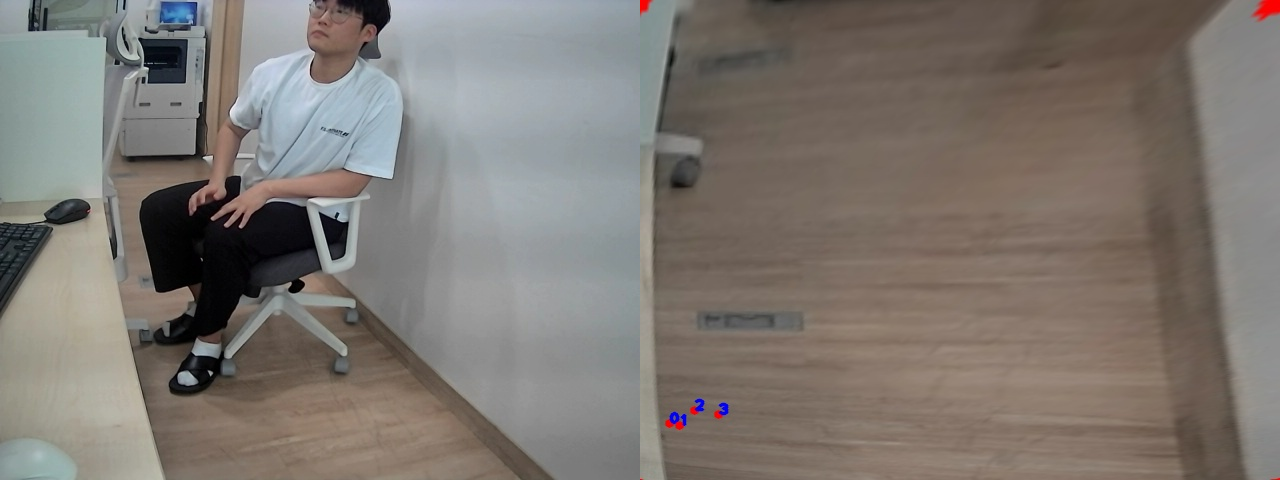

In [46]:
connect_img[3]

In [57]:

import cv2
import numpy as np
import glob

frameSize = (500, 500)

out = cv2.VideoWriter('output_video2.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 2, frameSize)

for filename in [f"connect{x}.jpg" for x in range(23)]:
    img = cv2.imread(f"./connect/{filename}")
    out.write(img)

out.release()

In [59]:
test_list = [1,2,3]

In [67]:
a  = [ str(x+1) +"aa" for x in test_list]
a  = [ f"{x+1}계산된 값" for x in test_list]
a

['2계산된 값', '3계산된 값', '4계산된 값']

: 

In [55]:
for filename in [f"connect{x}.jpg" for x in range(23)]:
    print(filename)

connect0.jpg
connect1.jpg
connect2.jpg
connect3.jpg
connect4.jpg
connect5.jpg
connect6.jpg
connect7.jpg
connect8.jpg
connect9.jpg
connect10.jpg
connect11.jpg
connect12.jpg
connect13.jpg
connect14.jpg
connect15.jpg
connect16.jpg
connect17.jpg
connect18.jpg
connect19.jpg
connect20.jpg
connect21.jpg
connect22.jpg


In [53]:
file_list = [f"connect{x}.jpg" for x in range(23)]
file_list

['connect0.jpg',
 'connect1.jpg',
 'connect2.jpg',
 'connect3.jpg',
 'connect4.jpg',
 'connect5.jpg',
 'connect6.jpg',
 'connect7.jpg',
 'connect8.jpg',
 'connect9.jpg',
 'connect10.jpg',
 'connect11.jpg',
 'connect12.jpg',
 'connect13.jpg',
 'connect14.jpg',
 'connect15.jpg',
 'connect16.jpg',
 'connect17.jpg',
 'connect18.jpg',
 'connect19.jpg',
 'connect20.jpg',
 'connect21.jpg',
 'connect22.jpg']

In [38]:
imageWidth = 1920 # в данном примере зададим их константами
imageHeight = 1080

import numpy as np

def geoToList(latlon):
  return np.array((latlon['lat'], latlon['lng']))

def listToGeo(latlon):
  return {'lat': latlon[0], 'lng': latlon[1] }

def getGeoCoordinates(A, B, C, D, X, Y):
  A, B, C, D = list(map(geoToList, [A, B, C, D]))
  vBC = (C - B) / imageHeight
  vAD = (D - A) / imageHeight
  latlonPixel1 = vBC * (imageHeight - Y) + B
  latlonPixel2 = vAD * (imageHeight - Y) + A
  vM = (latlonPixel2 - latlonPixel1) / imageWidth
  Metrix = vM * X + latlonPixel1
  return listToGeo(Metrix)

array([[ 2.70400712e+01, -4.17338719e+00, -1.80125130e+03],
       [-3.37392339e+00,  3.66311682e+01, -5.48069755e+03],
       [-1.50134619e-02,  5.22034611e-02,  1.00000000e+00]])